## **[ SAS 중간고사 코드 정리 2 ]** 
### 3. 데이터 단계에서 사용되는 명령문
#### 1) 데이터 입력 구분자
- DLM
- DSD

In [1]:
*infile이 경로 지정에만 쓰는게 아님! 구분자 지정에도 쓴다~~;;;;;
data num1;
    infile cards dlm='ab';
    input x y z ;
    datalines;
1aa2ab3
4b5bab6
7a8b9
*ab가 들어간 모든 문자는 하나의 구분자로 인식해 공백으로 반환 > 데이터 프레임으로 정리됨! ;;;;
;
run;
proc print;run;

SAS Connection established. Subprocess id is 5869



Obs,x,y,z
1,1,2,3
2,4,5,6
3,7,8,9


In [5]:
data num2;
    infile cards dsd dlm='ab';
    * dsd의 구분자가 콤마가 아닐 때 dlm으로 따로 지정!!;;;
    * 연속된 문자 사이에 결측치를 끼어서 반환~~;;;;
    input x y z ;
    cards;
1aa2ab3
4b5bab6
7a8b9
;run;

proc print; run;

Obs,x,y,z
1,1,.,2
2,4,5,.
3,7,8,9


< 데이터 부족한 경우 처리 >
- missover
- truncover
- flowover(default)
- stopover

In [16]:
*stopover은 안되니까 sas 창에서 하기!!;;;

data one;
    infile cards missover;
    input a b c;
    cards;
1 2 3 
4 5  
6 7 8 
9 0 1 2 
3 4 5 
;run;
proc print data=one;run;

Obs,a,b,c
1,1,2,3
2,4,5,.
3,6,7,8
4,9,0,1
5,3,4,5


In [18]:
data score;
    infile cards dlm=',';
    input t1 t2 t3;
    cards;
91,87,95
97,,92  
*공백 결측치에 flowover때문에 앞으로 떙겨옴
1,1,1
;
run;

proc print;run;

Obs,t1,t2,t3
1,91,87,95
2,97,92,.
3,1,1,1


In [26]:
data score;
    infile cards missover dsd;
    input t1 t2 t3;
    cards;
91,87,95
97,,92 
1,1,1
;
*공백 결측치에 flowover때문에 앞으로 떙겨옴
run;

proc print;run;

Obs,t1,t2,t3
1,91,87,95
2,97,.,92
3,1,1,1


In [27]:
data case1;
    infile cards dlm='&$*,';
    *공백 상관없이 &$*, 이게 들어가있는 것은 모두 구분자로 인식함!!;;;
    input a b c;
    cards;
11&$12,  13
2$$$22*  23
   3* 32, 33
;run;

proc print; run;

Obs,a,b,c
1,11,12,13
2,2,22,23
3,3,32,33


#### 2) 할당문과 선언문

In [38]:
data exam;
    *length 지정해주기! 순서 바뀌지 않게하기! ;;
    length id$3 name$12; 
    input id $ name$ mid final;
    *변수 할당;
    x=30;
    major='통계학';
    major_id = 'STA'||id;
    mean = (mid+final)/2;
    y=mid**3;
    * 변수 선언;
    label name='이름' mid='중간성적' final='기말성적';
    cards;
001 김철수 10 40
002 이영희 15 10
001 강민호 50 15
001 박지수 20 .
;
run;

proc print; run;

Obs,id,name,mid,final,x,major,major_id,mean,y
1,001,김철수,10,40,30,통계학,STA001,25.0,1000
2,002,이영희,15,10,30,통계학,STA002,12.5,3375
3,001,강민호,50,15,30,통계학,STA001,32.5,125000
4,001,박지수,20,.,30,통계학,STA001,.,8000


#### 3) 함수의 이용 : 숫자함수

In [43]:
data exam;
    *length 지정해주기! 순서 바뀌지 않게하기! ;;
    length id$3 name$12; 
    input id $ name$ mid final;
    *변수 할당;
    x=30;
    major='통계학';
    major_id = 'STA'||id;
    mean = (mid+final)/2;
    y=mid**3;
    * 변수 선언;
    label name='이름' mid='중간성적' final='기말성적';
    cards;
001 김철수 10 40
002 이영희 15 10
001 강민호 50 15
001 박지수 20 .
;
run;

proc print; run;

Obs,id,name,mid,final,x,major,major_id,mean,y
1,001,김철수,10,40,30,통계학,STA001,25.0,1000
2,002,이영희,15,10,30,통계학,STA002,12.5,3375
3,001,강민호,50,15,30,통계학,STA001,32.5,125000
4,001,박지수,20,.,30,통계학,STA001,.,8000


In [53]:
data exam1;
    input name$1-11 mid final enterm enterd;
    mid = int(mid);
    max_mf = max(mid, final, 30);
    name = compress(name);
    f_name = substr(name, 1, 3);
    ent_day = mdy(enterm, enterd, 1999);
    *월 ,일로 sas 날짜 변수 만들기;;;;
    ent_week = weekday(ent_day);
    format ent_day yymmdd6.;
cards;
김 철 수 10.1 40 11 22
이  영희 15.7 10 11 29
강민호   50.3 15 12 05
박지  수 20.8  . 12 15
;
run;
proc print; run;

Obs,name,mid,final,enterm,enterd,max_mf,f_name,ent_day,ent_week
1,김철수,10,40,11,22,40,김,991122,2
2,이영희,15,10,11,29,30,이,991129,2
3,강민호,50,15,12,5,50,강,991205,1
4,박지수,20,.,12,15,30,박,991215,4


In [65]:
data score;
    input name$10. (x1-x3)(1.) y1-y3;
    total = sum(of x1-x3 y1-y3);
    average = mean(of x1-x3 y1-y3);
    logx = log(x1);
    sqrtx = sqrt(x1);
    intmean = int(average);
cards;
김철수 551 2 1 3
최민지 .31 4 5 1 
이영희 153 2 . 2
오인수 412 4 . .
;
run;
proc print data=score;
run;

Obs,name,x1,x2,x3,y1,y2,y3,total,average,logx,sqrtx,intmean
1,김철수,5,5,1,2,1,3,17,2.83333,1.60944,2.23607,2
2,최민지,.,3,1,4,5,1,14,2.80000,.,.,2
3,이영희,1,5,3,2,.,2,13,2.60000,0.00000,1.00000,2
4,오인수,4,1,2,4,.,.,11,2.75000,1.38629,2.00000,2


#### 4) 조건문 : IF

In [66]:
data one;
    input x y;
    if x<y then x=x-1;
    *조건이 참이면 시행!;;;/
    cards;
12 13
14 15
11 8
;
proc print;run;

Obs,x,y
1,11,13
2,13,15
3,11,8


In [68]:
data two;
    input x y;
    if x>13 then z=x-1;
    *조건을 만족하지 않으면 z는 결측치로 반환;;;;;;
    cards;
12 13
14 15 
11 8
;
run;
proc print;run;

Obs,x,y,z
1,12,13,.
2,14,15,13
3,11,8,.


In [69]:
*IF는 한 조건에 하나의 문장만 시행한다! (여기서 y는 조건에 관계 없이 시행);;
data one;
    input x y;
    if x<13 then x=x-1;
                 y=y-1;
    cards;
12 13 
14 15
11 8
;
run;
proc print;run;

Obs,x,y
1,11,12
2,14,14
3,10,7


In [70]:
*여러개의 조건문 : do, end로 지정;;
data one;
    input x y;
    if x<13 then do; 
        x=x-1;
        y=y-1;
        end;
    cards;
12 13 
14 15
11 8
;
run;
proc print;run;

Obs,x,y
1,11,12
2,14,15
3,10,7


In [72]:
*else if;
data grade;
    input id score;
    if score>=90 then grade='A';
    else if score>=80 then grade='B';
    else if score>=70 then grade='C';
    else if score>=60 then grade='D';
    else grade='F';
    cards;
123 89
456 92
376 73
129 55
;
run;
proc print;run;

Obs,id,score,grade
1,123,89,B
2,456,92,A
3,376,73,C
4,129,55,F


In [73]:
*모두 if면 뒤에 걸린다;
data grade;
    input id score;
    if score>=90 then grade='A';
    if score>=80 then grade='B';
    if score>=70 then grade='C';
    if score>=60 then grade='D';
    else grade='F';
    cards;
123 89
456 92
376 73
129 55
;
run;
proc print;run;

Obs,id,score,grade
1,123,89,D
2,456,92,D
3,376,73,D
4,129,55,F


In [75]:
*&를 이용해 수정;;
data grade;
    input id score;
    if score>=90 then grade='A';
    if score>=80 & score<90 then grade='B';
    if score>=70 & score<80 then grade='C';
    if score>=60 & score<70 then grade='D';
    if score<60 then grade='F';
    cards;
123 89
456 92
376 73
129 55
;
run;
proc print;run;

Obs,id,score,grade
1,123,89,B
2,456,92,A
3,376,73,C
4,129,55,F


In [76]:
data exam;
    input id$ name$10. mid final;
    cards;
001 김철수 10 40
002 이영희 15 10
001 강민호 50 15
001 박지수 20 .
;
run;
proc print;run;

Obs,id,name,mid,final
1,001,김철수,10,40
2,002,이영희,15,10
3,001,강민호,50,15
4,001,박지수,20,.


In [82]:
data exam;
    input id$ name$10. mid final;
    *결측값 채우기;
    if final='.' then final=10;
    
    if (mid+final)>=50 then score1='P';
    if mid>=30 or final>=30 then score2 ='P';
    
    *공백이면 F 채우기;
    if score1=' ' then do;
    score1 = 'F';
    score2 = 'F';
    end;
    
    cards;
001 김철수 10 40
002 이영희 15 10
001 강민호 50 15
001 박지수 20 .
;
run;
proc print;run;

Obs,id,name,mid,final,score1,score2
1,001,김철수,10,40,P,P
2,002,이영희,15,10,,
3,001,강민호,50,15,P,P
4,001,박지수,20,10,,


In [86]:
*lrecl=30000pad : 데이터 셀이 너무 길어서 출력이 안될때;
data sample;
    infile 'sample1.txt' lrecl=30000pad;
    input id$ age gender height weight favor Age_range$12.;
    if age<30 then Age_range='20대';
    else if age<35 then Age_range='30대초반';
    else Age_range='30대 후반';
    
    label age='연령' gender='성별' height='키' weight='체중' favor='선호하는음식';
run;

proc print data=sample label;
run;

Obs,id,연령,성별,키,체중,선호하는음식,Age_range
1,1,30,1,183,82,1,30대초반
2,2,28,2,160,62,3,20대
3,3,27,1,178,77,2,20대
4,4,23,1,172,70,2,20대
5,5,25,1,168,72,3,20대
6,6,27,1,179,77,1,20대
7,7,26,1,169,71,1,20대
8,8,29,1,171,75,3,20대
9,9,34,2,158,60,2,30대초반
10,10,31,1,183,77,3,30대초반


#### 5) 날짜변수

In [89]:
data dept;
/* 포인터 input */
    input name $9. +1 bdate date7. +1 hired mmddyy8.;
    
    hiredate = hired + (365.25 *3);
    hireqtr = qtr(hiredate);
    
    if hired > '01jan94'D then new='yes';
    
    format bdate mmddyy8. hired yymmdd8. hiredate weekdate17. ;
    cards;
김철수 01jan60 09-15-90
최민지 05oct49 01-24-92
이영희 18mar88 10-10-93
오인수 29feb80 05-29-94
;run;

proc print data=dept;run;

Obs,name,bdate,hired,hiredate,hireqtr,new
1,김철수,01/01/60,90-09-15,"Tue, Sep 14, 1993",3,
2,최민지,10/05/49,92-01-24,"Mon, Jan 23, 1995",1,
3,이영희,03/18/88,93-10-10,"Wed, Oct 9, 1996",4,
4,오인수,02/29/80,94-05-29,"Wed, May 28, 1997",2,yes


#### 6) Retain 명령문
초깃값을 할당한다

In [90]:
*초깃값 지정하지 않았을 때 : 누적합 할당 X;
data ex;
    input a @@;
    total = a+total;
    cards;
    1 3 5 7
    ;
    run;

proc print; run;

Obs,a,total
1,1,.
2,3,.
3,5,.
4,7,.


In [92]:
data ex;
    input a @@;
    retain total 0;
    total = a+total;
    cards;
    1 3 5 7
    ;
    run;

proc print; run;

Obs,a,total
1,1,1
2,3,4
3,5,9
4,7,16


In [93]:
*retain쓴건 항상 먼저 나옴;
data wt;
    retain y 0;
    input x @@;
    y = 0.3*x + 0.7*y;
    cards;
1 2 3 4 5 
;
run;

proc print;run;

Obs,y,x
1,0.30000,1
2,0.81000,2
3,1.46700,3
4,2.22690,4
5,3.05883,5


#### 7) Array 명령문
반복계산에 사용(python의 for문)

In [95]:
*역코딩;
data score;
    input name $10. x1-x6;
    
    array aaa[3] x1 x3 x6;
    do i=1 to 3;
    aaa[i] = 6-aaa[i];
    end;
    
    drop i;
cards;
김철수 5 5 1 2 1 2 
최민지 5 3 1 4 5 3 
이영희 1 5 3 2 5 4
오인수 4 1 2 4 5 1 
;
run;
proc print;run;

Obs,name,x1,x2,x3,x4,x5,x6
1,김철수,1,5,5,2,1,4
2,최민지,1,3,5,4,5,3
3,이영희,5,5,3,2,5,2
4,오인수,2,1,4,4,5,5


In [99]:
data tscore;
    input name$10. math stat eng kor art;
    array aaa[5] math stat eng kor art;
    
    do i = 1 to 5;
    * 변수의 요소가 9이면 .(결측)으로 반환;
        if aaa[i] = 9 then aaa[i] = .;
    end;
    drop i;
cards;
김철수 5 5 1 2 1 
최민지 9 3 1 4 5 
이영희 1 5 3 2 9
오인수 4 1 2 4 9
;
run;
proc print;run;

Obs,name,math,stat,eng,kor,art
1,김철수,5,5,1,2,1
2,최민지,.,3,1,4,5
3,이영희,1,5,3,2,.
4,오인수,4,1,2,4,.


--------------------------
### 4. 데이터 셋의 결합 및 관리
#### 1) 세로 결합 (set)

In [104]:
*세로결합;
data male;
    input name$9. gender $ mid final pre;
    cards;
김철수 M 10 40 30
강민호 M 50 15 45
;
run;
proc print;run;

Obs,name,gender,mid,final,pre
1,김철수,M,10,40,30
2,강민호,M,50,15,45


In [106]:
data female;
    input name$9. gender$ mid final;
    cards;
이영희 F 15 10
박지수 F 20 .
;run;

proc print;run;

Obs,name,gender,mid,final
1,이영희,F,15,10
2,박지수,F,20,.


In [107]:
*세로 결합;
data combine;
    set male female;
    if final=. then final=mid;
run;
proc print; run;

Obs,name,gender,mid,final,pre
1,김철수,M,10,40,30
2,강민호,M,50,15,45
3,이영희,F,15,10,.
4,박지수,F,20,20,.


#### 2) 가로 결합(merge, update)

In [128]:
data mid;
    input name$10. gender$ pre mid;
    cards;
김철수 M 30 10
강민호 M 45 50
이영희 F .  15
박지수 F .  20
최병호 F .  8
; 
run;

data final;
    input name$10. gender$ pre final;
    cards;
이영희 F 32 10
김철수 M .  40
박지수 F 15 20
김민호 M .  15
;
run;

*특정 변수에 대해 가로 결합(merge)을 위해 특정 변수(by)에 대해 sort해준다;
proc sort data=mid; 
     by name; 
     run;
     
proc sort data=final; 
     by name; 
     run;

data all;
    merge mid final;
    by name;
run;

proc print data=all;run;

Obs,name,gender,pre,mid,final
1,강민호,M,45,50,.
2,김민호,M,.,.,15
3,김철수,M,.,10,40
4,박지수,F,15,20,20
5,이영희,F,32,15,10
6,최병호,F,.,8,.


In [129]:
*뒤 결측값으로 대체되지 않고싶을때 : update;
data all2;
    update mid final;
    by name;
run;

proc print data=all2;run;

Obs,name,gender,pre,mid,final
1,강민호,M,45,50,.
2,김민호,M,.,.,15
3,김철수,M,30,10,40
4,박지수,F,15,20,20
5,이영희,F,32,15,10
6,최병호,F,.,8,.


In [131]:
*새로운 변수 추가해 결합;
data mid;
    input name$10. gender$ pre mid;
    cards;
김철수 M 30 10
강민호 M 45 50
이영희 F .  15
박지수 F .  20
최병호 F .  8
; 
run;

data final;
    input name$10. gender$ pre final;
    cards;
이영희 F 32 10
김철수 M .  40
박지수 F 15 20
김민호 M .  15
이만호 F 50 100
;
run;

proc sort data=mid;
    by name; run;
proc sort data=final;
    by name; run;
    
data all3;
    merge mid final;
    by name;
    if mid;
    run;
proc print data=all3;run;

Obs,name,gender,pre,mid,final
1,강민호,M,45,50,.
2,김철수,M,.,10,40
3,박지수,F,15,20,20
4,이영희,F,32,15,10
5,최병호,F,.,8,.


In [132]:
data all4;
    merge mid final;
    by name;
    if final;
    run;
proc print; run;

Obs,name,gender,pre,mid,final
1,김민호,M,.,.,15
2,김철수,M,.,10,40
3,박지수,F,15,20,20
4,이만호,F,50,.,100
5,이영희,F,32,15,10


#### 3) 데이터 셋 옵션의 사용
- keep, drop, rename 등
- 출력 obs 개수 지정

In [133]:
data all;
* 가져올 데이터 지정해서 특정 변수만 가져오기!;;;
    merge mid(keep=name mid pre obs=4) final(drop=gender rename=(pre=pre1));
    by name;run;
    
proc print data=all;
run;

Obs,name,pre,mid,pre1,final
1,강민호,45,50,.,.
2,김민호,.,.,.,15
3,김철수,30,10,.,40
4,박지수,.,20,15,20
5,이만호,.,.,50,100
6,이영희,.,15,32,10


In [135]:
data all1;
    merge mid final;
    by name;
    rename mid = m_score final = f_score;
    drop gender pre;
    run;

proc print data=all1;
run;

Obs,name,m_score,f_score
1,강민호,50,.
2,김민호,.,15
3,김철수,10,40
4,박지수,20,20
5,이만호,.,100
6,이영희,15,10
7,최병호,8,.


In [136]:
data all1;
    merge mid final;
    by name;
    rename mid = m_score final = f_score;
    drop gender pre;
    run;

proc print data=all1(firstobs=2 obs=3);
title '두번째, 세번째 obs만 가져옴';
run;

Obs,name,m_score,f_score
2,김민호,.,15
3,김철수,10,40


#### 4) DO-END 명령문
반복문

In [137]:
data ab;
    wage=100;
    
    do i = 1 to 12;
    earned + wage;
    end;
    run;
    
proc print; run;

Obs,wage,i,earned
1,100,13,1200


In [140]:
*월 단위 이자소득 계산 프로그램;
data a;
    amount = 1000;
    rate = 0.075;
    earned = 0;
    
    do month=1 to 12;
    earned + (amount + earned)*(rate/12);
    *earned에 계속 업데이트해서 저장함(month 1~12 진행할동안);
    end;
run;

proc print;run;

Obs,amount,rate,earned,month
1,1000,0.075,77.6326,13


In [143]:
*10년동안 2000원을 투자함. 연이율 7.5%일 때 이자수입???;

data b;
    value = 2000;
    
    do i=1 to 10;
    interest = value*0.075;
    value = value + interest;
    
    *반복 수 집계변수;
    year+1;
    
    *과정 출력;
    output;

    end;
    run;
proc print;run;

Obs,value,i,interest,year
1,2150.00,1,150.000,1
2,2311.25,2,161.250,2
3,2484.59,3,173.344,3
4,2670.94,4,186.345,4
5,2871.26,5,200.320,5
6,3086.60,6,215.344,6
7,3318.10,7,231.495,7
8,3566.96,8,248.857,8
9,3834.48,9,267.522,9
10,4122.06,10,287.586,10


In [145]:
*20년동안 15만원 투자, 연이율 0.3%의 이자수입 계산;
data c;
    value = 150000;
    do year=1 to 20;
    earned = value*0.003;
    value = value+earned;
    
    year_count +1;
    output;
    
    end;
    run;
proc print; run;

Obs,value,year,earned,year_count
1,150450.00,1,450.000,1
2,150901.35,2,451.350,2
3,151354.05,3,452.704,3
4,151808.12,4,454.062,4
5,152263.54,5,455.424,5
6,152720.33,6,456.791,6
7,153178.49,7,458.161,7
8,153638.03,8,459.535,8
9,154098.94,9,460.914,9
10,154561.24,10,462.297,10


#### 1. Do - End 문

In [149]:
data a;
    ff = 0;
    do i = 1 to 5;
    ff + i;
    put ff =;
    end;
run;


In [150]:
data c;
    n=0;
    do i=1 to 5 by 2;
    n+i;
    put n=;
    end;
run;


#### 2. Do - Until 문
특정 조건이 참이될때까지 반복. 참이되면 실행 중지

In [ ]:
/* data a;
    rate = 0.1;
    money = 2000;
    total = 0;
    
    do until(total>=50000);
    total = money + 2000;
    money = money * rate;
    
    year+1;
    end;
    run;
    
proc print;run; */ /* 이거 아님~~~~~*/

In [2]:
data c;
    do until (money>=50000);
    money + 2000;
    money + money*0.1;
    year+1;
    end;
    run;
    
proc print;run;

Obs,money,year
1,53949.97,13


In [3]:
data c1;
    do i=1 to 10 until(cap2>=50000);
    cap2 + 2000;
    cap2 + cap2*0.1;
    year+1;
    end;
    run;
proc print;run;

Obs,i,cap2,year
1,11,35062.33,10


In [6]:
data d;
    n=0;
    do until(n>=10);
    n+1;
    put n=;
    end;
    run;
proc print;run;

Obs,n
1,10


#### 3. Do-While문
조건이 참일 경우에만 반복

In [8]:
data a;
    n=0;
    do while(n<10);
    n+1;
    put n=;
    end;
proc print;run;

Obs,n
1,10


In [11]:
data sleep;
    do while(money<=1000000);
    money+5000;
    money + money*0.045;
    month+1;
    year = (month+1)/12;
    end;
    run;
proc print; run;

Obs,money,month,year
1,1029193.17,52,4.41667


In [14]:
data survey;
    do age=10 to 50 by 10;
        do gender='Female', 'Male';
            input size response @@;
            output;
/*             output 꼭 넣어줘야 전체 데이터 row 출력됨!! */
        end;
    end;
    
    label age='연령' gender='성별' size='표본 수' response='응답 수';
    cards;
40 17 30 11
50 12 20 15
30 21 60 34
40 12 40 21
20 14 30 19
;
run;

proc print data=survey label;
run;

Obs,연령,성별,표본 수,응답 수
1,10,Female,40,17
2,10,Male,30,11
3,20,Female,50,12
4,20,Male,20,15
5,30,Female,30,21
6,30,Male,60,34
7,40,Female,40,12
8,40,Male,40,21
9,50,Female,20,14
10,50,Male,30,19


In [17]:
data survey;
    do age= 10 to 50 by 10;
        do gender='Female', 'Male';
            input size yes @@;
        output;
        end;
    end;
    label age='연령' gender='성별';
    cards;
40 17 30 11
50 12 20 15
30 21 60 34
40 12 40 21
20 14 30 19
;
run;

proc print data=survey label;
run;

Obs,연령,성별,size,yes
1,10,Female,40,17
2,10,Male,30,11
3,20,Female,50,12
4,20,Male,20,15
5,30,Female,30,21
6,30,Male,60,34
7,40,Female,40,12
8,40,Male,40,21
9,50,Female,20,14
10,50,Male,30,19


In [18]:
*난수 발생 : rand()함수;
data a;
    do i=1 to 30;
    x=rand('normal', 75, 30);
    output;
    end;
    
    run;
proc print;run;

Obs,i,x
1,1,90.935
2,2,64.319
3,3,90.458
4,4,63.250
5,5,91.038
6,6,86.029
7,7,99.715
8,8,99.391
9,9,57.080
10,10,39.748


#### 5) 자동변수
- _N_, _ERROR_ 이용해 변수 만들기

In [20]:
data score;
    input dept$ id$ score grade$;
    if _n_=1 then score=17;
    obsum = _n_;
    error = _error_;
    cards;
stat s01 15 c
stat s02 40 a
stat s03 35 b
math m01 32 b
math m02 54 a
math m03 c c
math m04 63 a
;
run;

proc print data=score;run;

Obs,dept,id,score,grade,obsum,error
1,stat,s01,17,c,1,0
2,stat,s02,40,a,2,0
3,stat,s03,35,b,3,0
4,math,m01,32,b,4,0
5,math,m02,54,a,5,0
6,math,m03,.,c,6,1
7,math,m04,63,a,7,0


In [21]:
data score;
    input dept$ id$ score grade$;
    if _n_=1 then score=17;
    obsum = _n_;
    error = _error_;
    cards;
stat s01 15 c
stat s02 40 a
stat s03 35 b
math m01 32 b
math m02 54 a
math m03 c c
math m04 63 a
;
run;

proc sort data=score;
    * dept로 정렬한 후 그다음 score기준으로 정렬;
    by dept score;
proc print data=score;run;

Obs,dept,id,score,grade,obsum,error
1,math,m03,.,c,6,1
2,math,m01,32,b,4,0
3,math,m02,54,a,5,0
4,math,m04,63,a,7,0
5,stat,s01,17,c,1,0
6,stat,s03,35,b,3,0
7,stat,s02,40,a,2,0


In [24]:
*과목별로 1등, 꼴등만 가져오기!;
data rescore;
    set score;
    by dept;
    if first.dept=1 or last.dept=1;
    run;
proc print;
run;

Obs,dept,id,score,grade,obsum,error
1,math,m03,.,c,6,1
2,math,m04,63,a,7,0
3,stat,s01,17,c,1,0
4,stat,s02,40,a,2,0


In [27]:
proc sort data=score;
    by dept score;

data score2;
    set score;
    by dept;
    f_dept = first.dept;
    l_dept = last.dept;
    
    if first.dept=1 or last.dept=1;
    run;
    
proc print;run;

Obs,dept,id,score,grade,obsum,error,f_dept,l_dept
1,math,m03,.,c,6,1,1,0
2,math,m04,63,a,7,0,0,1
3,stat,s01,17,c,1,0,1,0
4,stat,s02,40,a,2,0,0,1


-------------------
### 5. 데이터 요약 및 표현
#### 1) PROC MEANS

In [11]:
data htwt;
    input name$9. gender$ dept$ age height weight;
    cards;
김철수 M Stat 25 170 67
강민호 M Stat 20 169 70
이영희 F Math 19 160 58
박지수 F Econ 21 160 59
최병호 M Math 28 177 62
장순미 F Stat 22 173 60
이상호 M Econ 19 170 71
김미숙 F Math 16 150 48
박흥식 M Econ 20 165 53
유은영 F Stat 16 169 57
;
run;
proc print;run;

Obs,name,gender,dept,age,height,weight
1,김철수,M,Stat,25,170,67
2,강민호,M,Stat,20,169,70
3,이영희,F,Math,19,160,58
4,박지수,F,Econ,21,160,59
5,최병호,M,Math,28,177,62
6,장순미,F,Stat,22,173,60
7,이상호,M,Econ,19,170,71
8,김미숙,F,Math,16,150,48
9,박흥식,M,Econ,20,165,53
10,유은영,F,Stat,16,169,57


In [37]:
*by : sort 앞에서 꼭 해줘야함! ;;;;;
proc sort data=htwt;
    by gender;
    
proc means data=htwt maxdex=2;
    by gender;
    var age height weight;
run;

Variable,N,Mean,Std Dev,Minimum,Maximum
age height weight,5 5 5,18.80 162.40 56.40,2.77 8.96 4.83,16.00 150.00 48.00,22.00 173.00 60.00
Variable,N,Mean,Std Dev,Minimum,Maximum
age height weight,5 5 5,22.40 170.20 64.60,3.91 4.32 7.37,19.00 165.00 53.00,28.00 177.00 71.00


In [38]:
*class : sort 없어도 됨! ;;;
proc means data=htwt;
    class gender;
    var age height weight;
    run;

gender,N Obs,Variable,N,Mean,Std Dev,Minimum,Maximum
F,5,age height weight,5 5 5,18.8000000 162.4000000 56.4000000,2.7748874 8.9610267 4.8270074,16.0000000 150.0000000 48.0000000,22.0000000 173.0000000 60.0000000
M,5,age height weight,5 5 5,22.4000000 170.2000000 64.6000000,3.9115214 4.3243497 7.3688534,19.0000000 165.0000000 53.0000000,28.0000000 177.0000000 71.0000000


In [45]:
proc means data=htwt noprint descending maxdec=2;
    class gender dept;
    var age height weight;
    output out = htwt_m mean=;
run;

proc print data=htwt_m ;run;

Obs,gender,dept,_TYPE_,_FREQ_,age,height,weight
1,F,Econ,3,1,21.00,160.000,59.0
2,F,Math,3,2,17.50,155.000,53.0
3,F,Stat,3,2,19.00,171.000,58.5
4,M,Econ,3,2,19.50,167.500,62.0
5,M,Math,3,1,28.00,177.000,62.0
6,M,Stat,3,2,22.50,169.500,68.5
7,F,,2,5,18.80,162.400,56.4
8,M,,2,5,22.40,170.200,64.6
9,,Econ,1,3,20.00,165.000,61.0
10,,Math,1,3,21.00,162.333,56.0


In [46]:
*nway : 최종적으로 알고자 하는 부분만 출력;
proc means data=htwt noprint descending maxdec=2 nway;
    class gender dept;
    var age height weight;
    output out = htwt_m mean=;
run;

proc print data=htwt_m ;run;

Obs,gender,dept,_TYPE_,_FREQ_,age,height,weight
1,F,Econ,3,1,21.0,160.0,59.0
2,F,Math,3,2,17.5,155.0,53.0
3,F,Stat,3,2,19.0,171.0,58.5
4,M,Econ,3,2,19.5,167.5,62.0
5,M,Math,3,1,28.0,177.0,62.0
6,M,Stat,3,2,22.5,169.5,68.5


In [52]:
*nway : 최종적으로 알고자 하는 부분만 출력;
proc means data=htwt noprint descending maxdec=2 nway;
    class gender dept;
    var age height weight;
    output out = htwt_m uss=;
run;

proc print data=htwt_m ;run;

Obs,gender,dept,_TYPE_,_FREQ_,age,height,weight
1,F,Econ,3,1,441,25600,3481
2,F,Math,3,2,617,48100,5668
3,F,Stat,3,2,740,58490,6849
4,M,Econ,3,2,761,56125,7850
5,M,Math,3,1,784,31329,3844
6,M,Stat,3,2,1025,57461,9389


In [73]:
proc means data=htwt noprint;
    class gender dept;
    var age height weight;
    output out=htwt_new mean=;
    run;

In [76]:
data new;
    set htwt_new;
    age_m = mean(age);
    age_s = sum(age);
    run;
proc print data=new;
run;

Obs,gender,dept,_TYPE_,_FREQ_,age,height,weight,age_m,age_s
1,,,0,10,20.60,166.300,60.5,20.60,20.60
2,,Econ,1,3,20.00,165.000,61.0,20.00,20.00
3,,Math,1,3,21.00,162.333,56.0,21.00,21.00
4,,Stat,1,4,20.75,170.250,63.5,20.75,20.75
5,F,,2,5,18.80,162.400,56.4,18.80,18.80
6,M,,2,5,22.40,170.200,64.6,22.40,22.40
7,F,Econ,3,1,21.00,160.000,59.0,21.00,21.00
8,F,Math,3,2,17.50,155.000,53.0,17.50,17.50
9,F,Stat,3,2,19.00,171.000,58.5,19.00,19.00
10,M,Econ,3,2,19.50,167.500,62.0,19.50,19.50


In [78]:
proc means data=htwt noprint;
    class gender dept;
    var age height weight;
    *여기서부터 한 땀 안에 들어가야함!!!! ;;;;;;
    output out=htwt_new 
        mean(age height weight) = mean_a mean_h mean_w
        sum(age height weight) = sum_a sum_h sum_w;
    run;
    
proc print data=htwt_new;run;

Obs,gender,dept,_TYPE_,_FREQ_,mean_a,mean_h,mean_w,sum_a,sum_h,sum_w
1,,,0,10,20.60,166.300,60.5,206,1663,605
2,,Econ,1,3,20.00,165.000,61.0,60,495,183
3,,Math,1,3,21.00,162.333,56.0,63,487,168
4,,Stat,1,4,20.75,170.250,63.5,83,681,254
5,F,,2,5,18.80,162.400,56.4,94,812,282
6,M,,2,5,22.40,170.200,64.6,112,851,323
7,F,Econ,3,1,21.00,160.000,59.0,21,160,59
8,F,Math,3,2,17.50,155.000,53.0,35,310,106
9,F,Stat,3,2,19.00,171.000,58.5,38,342,117
10,M,Econ,3,2,19.50,167.500,62.0,39,335,124


### 2) PROC UNIVARIATE



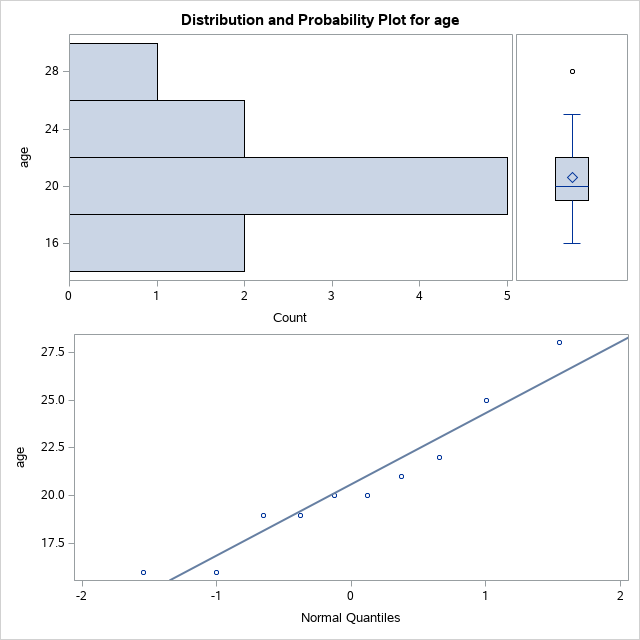
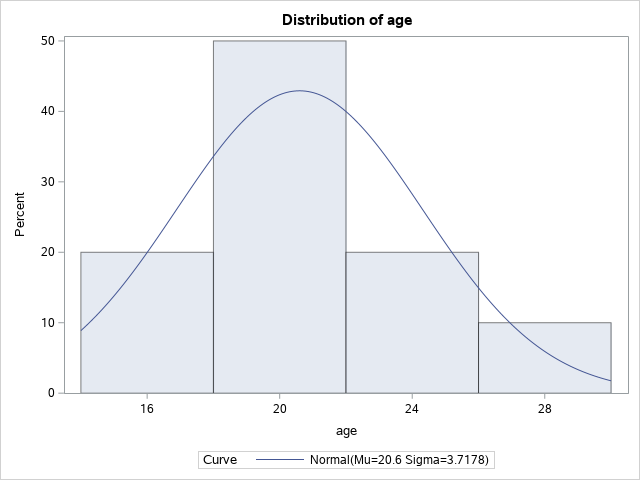
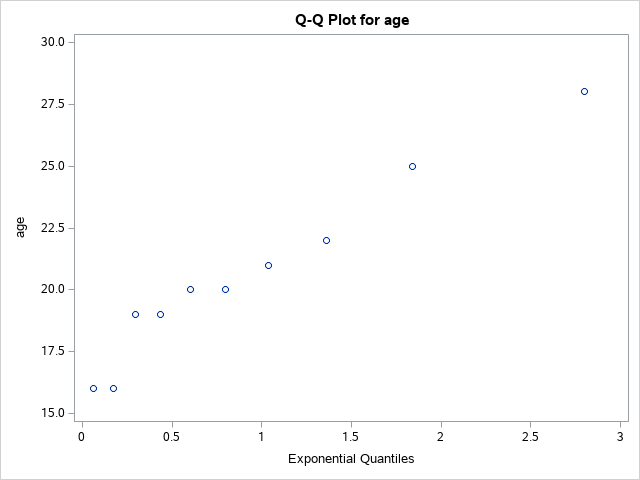
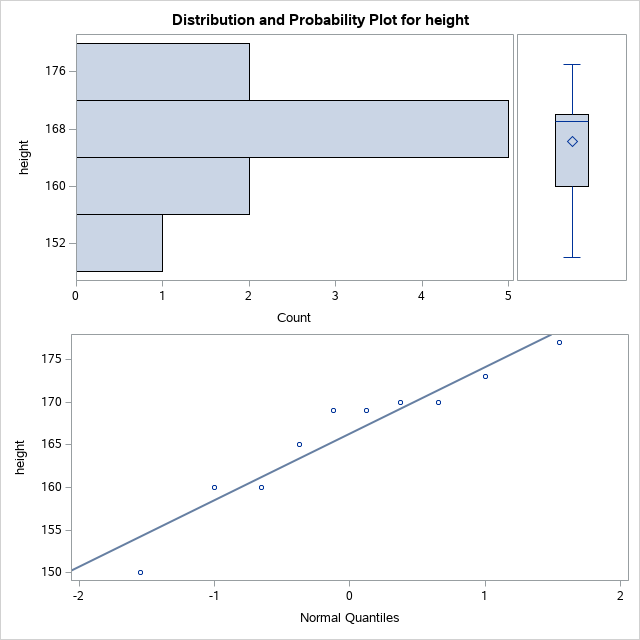
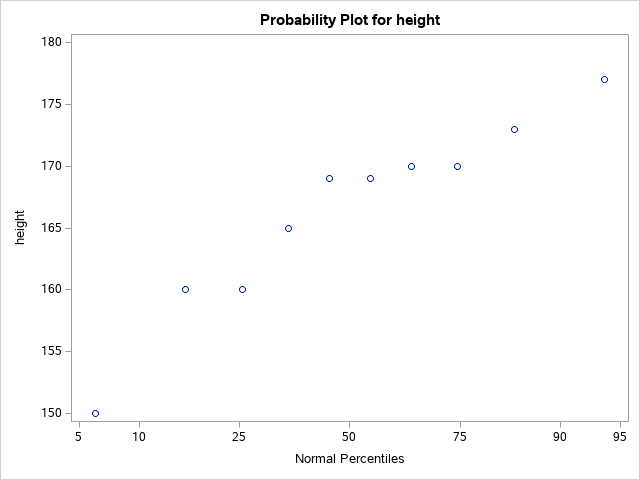
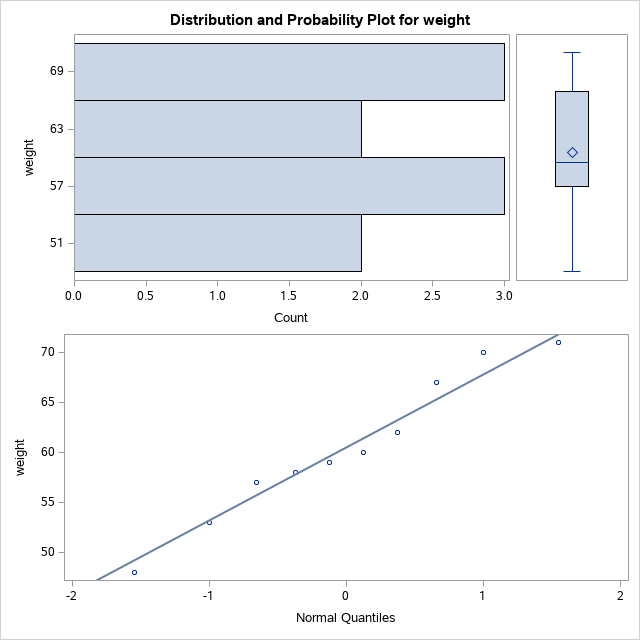
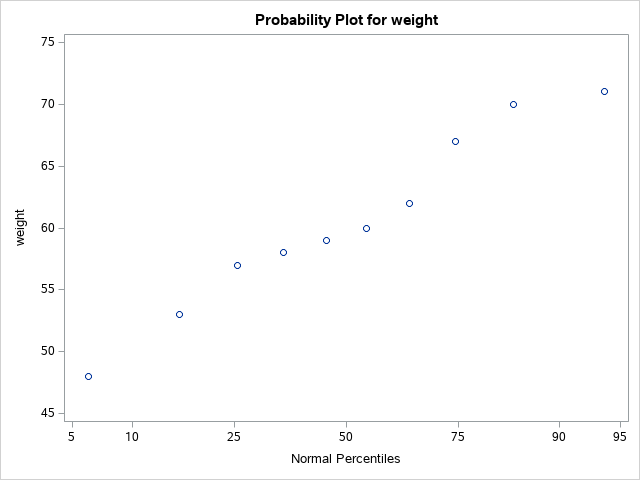

In [84]:
proc univariate data=htwt normal plots;
    var age height weight;
    histogram age/normal;
    probplot height weight/normal;
    qqplot age/exponential;
run;


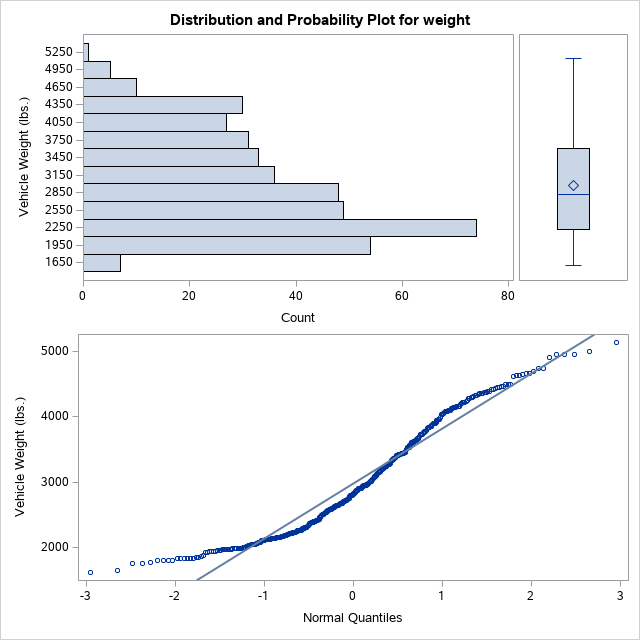
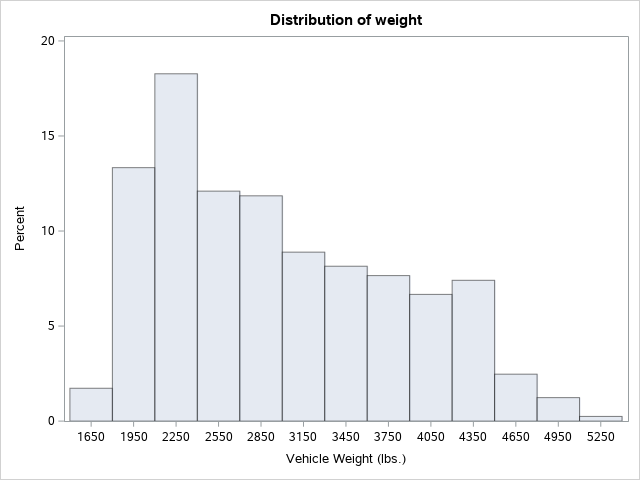

In [9]:
proc univariate data="sasuser.v94/data/cars.sas7bdat" normal plot;
    var weight;
    histogram weight;
    run;


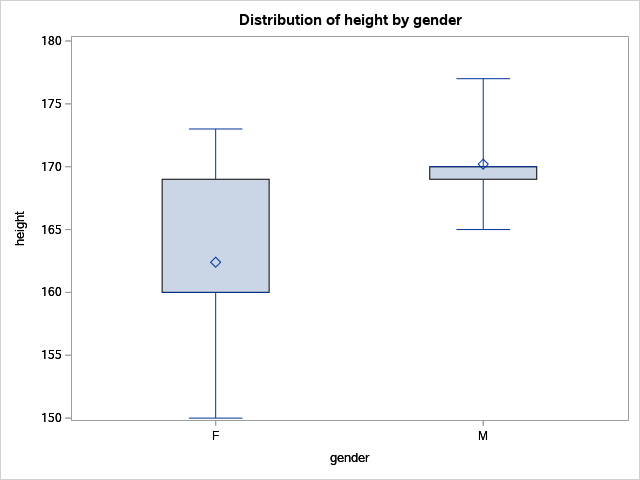
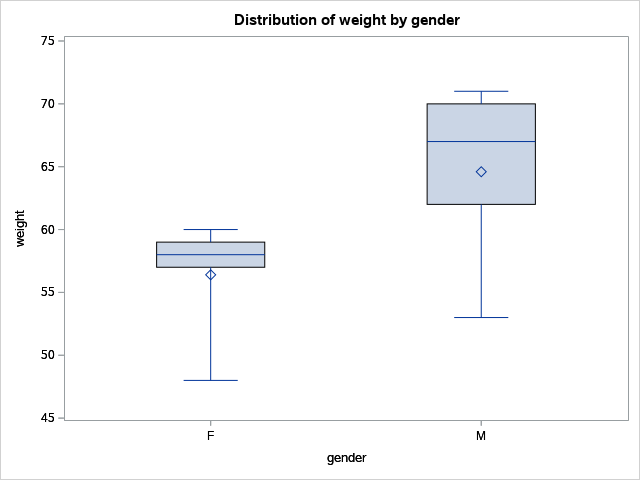

In [12]:
*height, weight별 gender boxplot 그리기
*skeletal : 최대, 최솟값 이용 / schematic : 1.5배 사분위범위 포함되는 값 이용;
proc sort data=htwt;
    by gender;
    run;

proc boxplot data=htwt;
    plot(height weight) * gender / boxstyle = skeletal;
run;


In [13]:
data ex1_1;
    input year$ score;
    cards;
L 88
L 67
L 77
L 75
L 84
L 90
L 95
L 73
L 69
L 80
L 79
L 82
L 96
L 62
H 82
H 86
H 88
H 92
H 77
H 72
H 96
H 75
H 68
H 96
H 85
H 86
H 76
H 89
H 83
;
run;

proc print data=ex1_1;run;

Obs,year,score
1,L,88
2,L,67
3,L,77
4,L,75
5,L,84
6,L,90
7,L,95
8,L,73
9,L,69
10,L,80


In [14]:
proc means data=ex1_1;
    class year;
    var score;
    run;


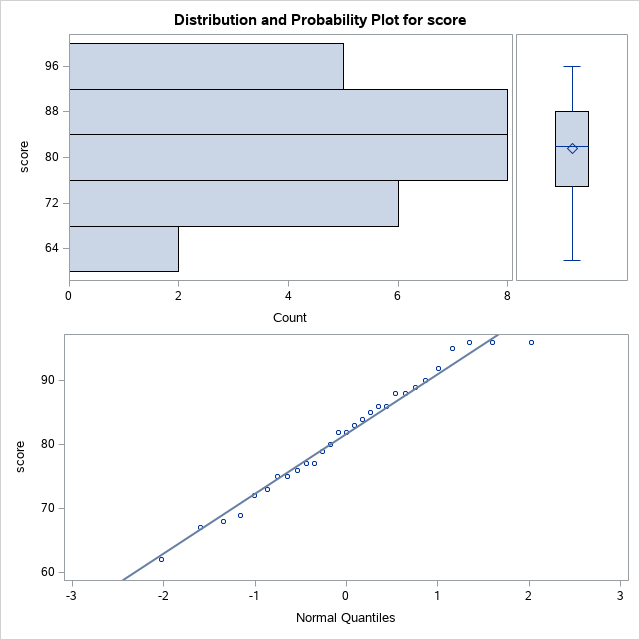
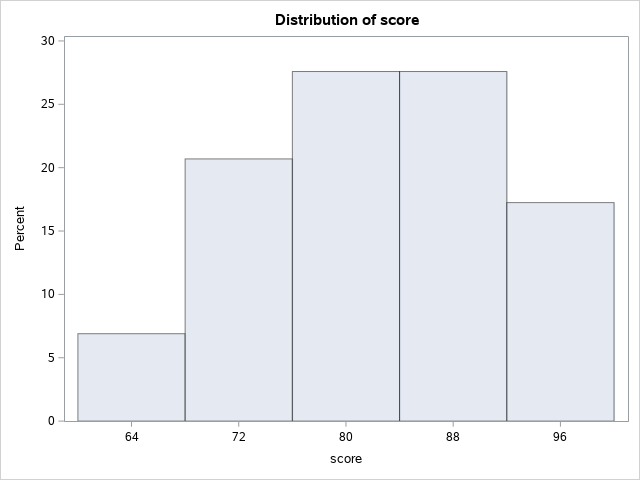
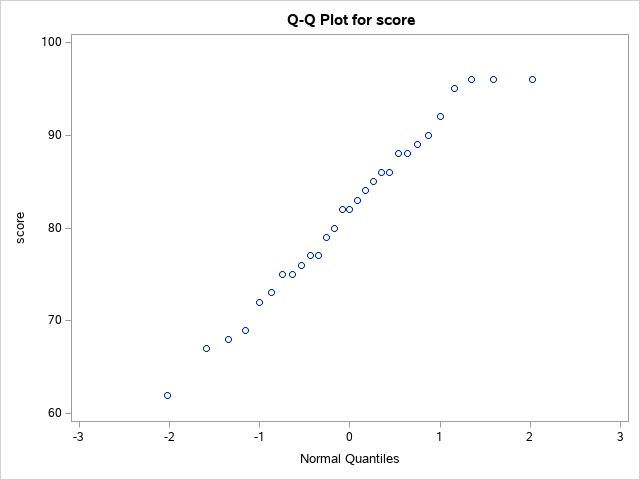
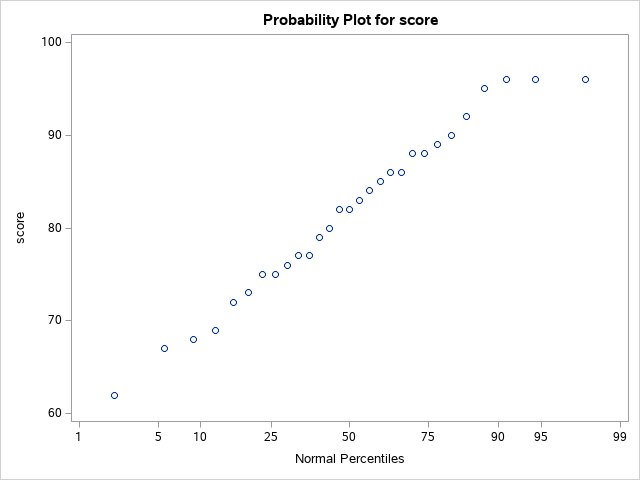

In [16]:
*정규성 만족한다!;;
proc univariate data=ex1_1 normal plot;
    var score;
    histotram score;
    qqplot score;
    probplot score;
    run;

In [17]:
proc means data=ex1_1 mean std cv max min;
    class year;
    var score;
    run;


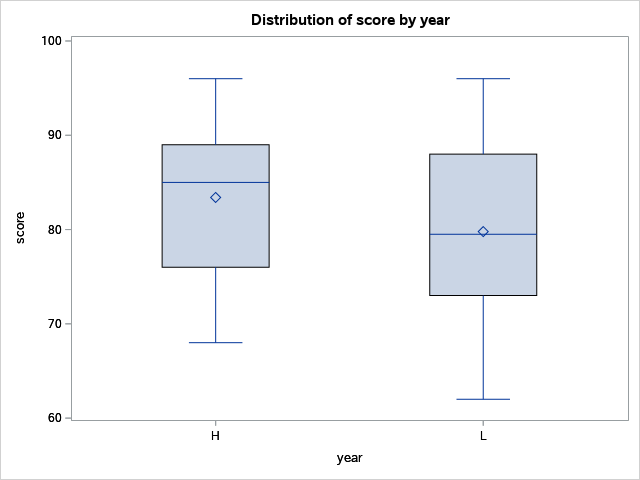

In [20]:
proc sort data=ex1_1;
    by year;
    run;

proc boxplot data=ex1_1;
    plot score*year / boxstyle=skeletal;
    run;

In [29]:
ods listing;
ods graphics off;

proc univariate data=ex1_1 plot;
    run;